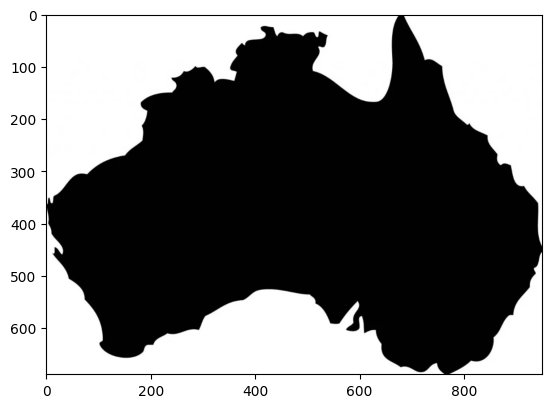

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv_image = cv2.imread("Australia.png")
plt.imshow(cv_image)
plt.show()

In [ ]:
import math
S = cv_image.shape[0] * cv_image.shape[1] / 50
a = round(math.sqrt(S * 2 / (3 * math.sqrt(3))))

import random
epsilon = 0.001

def get_triangle_area(x1, y1, x2, y2, x3, y3) -> float:
    return abs((x1 - x3) * (y2 - y3) + (x2 - x3) * (y3 - y1))


def is_point_in_triangle(x1, y1, x2, y2, x3, y3, x_point, y_point):
    tr_area = get_triangle_area(x1, y1, x2, y2, x3, y3)  # Площадь основного треугольника

    tr_area2 = get_triangle_area(x1, y1, x2, y2, x_point, y_point)  # Площади треугольника, образованного из 2 точек основного
    tr_area3 = get_triangle_area(x1, y1, x_point, y_point, x3, y3)  # и точки, которая проверяется на принадлежность
    tr_area4 = get_triangle_area(x2, y2, x_point, y_point, x3, y3)  # к треугольнику

    # Если площади образованных треугольников равны, то точка в треугольнике
    return abs(tr_area - tr_area2 - tr_area3 - tr_area4) <= epsilon

def is_point_in_hexagon(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x_point, y_point):
  res1 = is_point_in_triangle(x1, y1, x2, y2, x3, y3, x_point, y_point)
  res2 = is_point_in_triangle(x2, y2, x3, y3, x4, y4, x_point, y_point)
  res3 = is_point_in_triangle(x3, y3, x4, y4, x5, y5, x_point, y_point)
  res4 = is_point_in_triangle(x4, y4, x5, y5, x6, y6, x_point, y_point)
  res5 = is_point_in_triangle(x5, y5, x6, y6, x1, y1, x_point, y_point)
  res6 = is_point_in_triangle(x1, y1, x3, y3, x6, y6, x_point, y_point)
  res7 = is_point_in_triangle(x5, y5, x3, y3, x6, y6, x_point, y_point)
  return (res1 or res2 or res3 or res4 or res5 or res6 or res7)

def MonteCarlo(circles, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, treshold):
  min_x = min(x1, x2, x3, x4, x5, x6)
  max_x = max(x1, x2, x3, x4, x5, x6)
  min_y = min(y1, y2, y3, y4, y5, y6)
  max_y = max(y1, y2, y3, y4, y5, y6)

  if (min_x < 0):
    return False
  if (min_y < 0):
    return False
  if (max_x < 0):
    return False
  if (max_y < 0):
    return False

  if (min_x >= cv_image.shape[0]):
    return False
  if (min_y >= cv_image.shape[1]):
    return False

  if (max_x >= cv_image.shape[0]):
    return False
  if (max_y >= cv_image.shape[1]):
    return False
  cnt = 0

  for i in range(0, circles):
    random.seed(2 * i + 1)
    x = random.randint(min_x, max_x)
    y = random.randint(min_y, max_y)

    if (is_point_in_hexagon(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x, y)):
      if (cv_image[x][y] == np.array([1, 1, 1])).all() == True:
        cnt += 1
  if cnt == 0 :
    return False
  if cnt * 1. / circles >= treshold:
    return True

  return False

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open("Australia.png")
hexagons_coordinates = []

def draw_hexagonal_grid_on_image(image, rows, cols, size):
    draw = ImageDraw.Draw(image)
    hexagon = np.array([
        [np.cos(np.pi/3 * i) * size, np.sin(np.pi/3 * i) * size]
        for i in range(6)
    ])

    for row in range(rows):
        for col in range(cols):
            x_offset = 3/2 * size * col
            y_offset = np.sqrt(3) * size * (row + 0.5 * (col % 2))
            hexagon_translated = hexagon + [x_offset, y_offset]
            hexagon_translated = [(int(x), int(y)) for x, y in hexagon_translated]

            if (hexagon_translated[0][0] < 0 or hexagon_translated[0][0] > cv_image.shape[1] or
                hexagon_translated[1][0] < 0 or hexagon_translated[1][0] > cv_image.shape[1] or
                hexagon_translated[2][0] < 0 or hexagon_translated[2][0] > cv_image.shape[1] or
                hexagon_translated[3][0] < 0 or hexagon_translated[3][0] > cv_image.shape[1] or
                hexagon_translated[4][0] < 0 or hexagon_translated[4][0] > cv_image.shape[1] or
                hexagon_translated[5][0] < 0 or hexagon_translated[5][0] > cv_image.shape[1] or

                hexagon_translated[0][1] < 0 or hexagon_translated[0][1] > cv_image.shape[0] or
                hexagon_translated[1][1] < 0 or hexagon_translated[1][1] > cv_image.shape[0] or
                hexagon_translated[2][1] < 0 or hexagon_translated[2][1] > cv_image.shape[0] or
                hexagon_translated[3][1] < 0 or hexagon_translated[3][1] > cv_image.shape[0] or
                hexagon_translated[4][1] < 0 or hexagon_translated[4][1] > cv_image.shape[0] or
                hexagon_translated[5][1] < 0 or hexagon_translated[5][1] > cv_image.shape[0]) :
                continue

            if (MonteCarlo(10000, hexagon_translated[0][1],hexagon_translated[0][0],
                           hexagon_translated[1][1],hexagon_translated[1][0],
                           hexagon_translated[2][1],hexagon_translated[2][0],
                           hexagon_translated[3][1],hexagon_translated[3][0],
                           hexagon_translated[4][1],hexagon_translated[4][0],
                           hexagon_translated[5][1],hexagon_translated[5][0], 0.5)):

                draw.polygon(hexagon_translated, outline="red")
                hexagons_coordinates.append(hexagon_translated)


    return image

new_image = draw_hexagonal_grid_on_image(image.copy(), rows=20, cols=20, size=a)



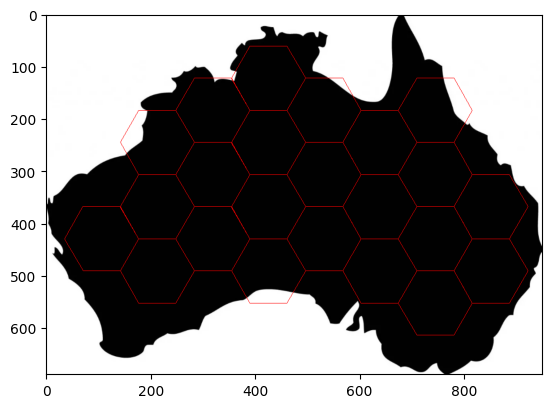

In [ ]:
coordinates = []
for i in range(0, len(hexagons_coordinates)):
  new_line = []
  for j in range(0, 6):
    new_line.append((hexagons_coordinates[i][j][1], hexagons_coordinates[i][j][0]))
  coordinates.append(new_line)

new_image.save("output_image.jpg")

plt.imshow(new_image)
plt.show()

In [ ]:
from scipy import integrate
import ipywidgets as ipw

def derivative(X, t, alpha0, omega, beta, c, gamma):
    x, y = X
    #print(type(t))
    dotx = x * (alpha0 * (1 + math.sin(omega * t)) - y)
    doty = y * (-c + beta * x)
    return np.array([dotx, doty])

In [ ]:
matrix = [[1., 1., 1.], [-2., -1., 0.], [4., 1., 0.]]

In [ ]:
inverse_matrix = np.linalg.inv(matrix)
nk = inverse_matrix.dot([0., 1., 0.])
nk

array([ 0.5, -2. ,  1.5])

In [ ]:

Nt = 1000
tmax = 30
t_array = np.linspace(0.,tmax, Nt)
dt = t_array[1] - t_array[0]

In [ ]:
def func1(b, c, d):
  return -1. * (nk[2] * b + nk[1] * c + nk[0] * d)

In [ ]:
alpha0 = 1. #mortality rate due to predators
beta = 1.
delta = 1.
omega = 0.
gamma = 1.
x0 = 0.1
y0 = 0.1

In [ ]:
from scipy.optimize import root
def equations2(x, dotx, doty, t):
    discriminant = (doty + beta * dotx - delta * alpha0 * (1+np.sin(omega * t))) * (doty + beta * dotx - delta * alpha0 * (1+ np.sin(omega * t))) + 4*doty * delta* alpha0 * (1 + np.sin(omega * t))
    sqrt_d = np.sqrt(discriminant)
    y1 = (- 1 * (doty + beta * dotx - delta * alpha0 *(1 + np.sin(omega * t))) - sqrt_d) / (2. * delta)
    y2 = (- 1 * (doty + beta * dotx - delta * alpha0 *(1 + np.sin(omega * t))) + sqrt_d) / (2. * delta)

    y_res = max(y1, y2)
    x_res = dotx / (alpha0 * ( 1+ np.sin(omega * t)) - y_res)

    return [x_res, y_res]


In [ ]:
import copy

In [ ]:

'''
def equations(x, left1, left2, time):
  eq1 = x[0] * (alpha0 * np.sin(omega * time) - x[1]) - left1
  eq2 = x[1] * (beta * x[0] - delta) - left2
  return [eq1, eq2]'''


def MNK():


  X0 = [x0, y0]

  nt = len(t_array)
  X  = np.zeros([nt, len(X0)])
  X[0] = X0
  X[1] = [0.10279002, 0.09733753]
  X[2] = [0.10576149, 0.09475413]

  for i in range(2, Nt-1):

    #print(X)
    '''if i == 0:
        val1 = func1(0, 0, X[i][0])
        val2 = func1(0, 0,X[i][1])
    else:
      if i == 1:
        val1 = func1( 0, X[i-1][0],X[i][0])
        val2 = func1(0,X[i-1][1],X[i][1])
      else:
          val1 = func1(X[i - 2][0],X[i-1][0],X[i][0])
          val2 = func1(X[i - 2][1],X[i-1][1],X[i][1])'''

    val1 = func1(X[i - 2][0],X[i-1][0],X[i][0])
    val2 = func1(X[i - 2][1],X[i-1][1],X[i][1])
    #print(val1, " ", val2)

    result = equations2(X[i], val1, val2, i * dt)
    X[i+1] = copy.deepcopy(result)
  return X






In [ ]:
res = MNK()

<ipython-input-261-e6dc35676f7b>:4: RuntimeWarning: invalid value encountered in sqrt
  sqrt_d = np.sqrt(discriminant)


In [ ]:
res

array([[0.1       , 0.1       ],
       [0.10279002, 0.09733753],
       [0.10576149, 0.09475413],
       ...,
       [       nan,        nan],
       [       nan,        nan],
       [       nan,        nan]])

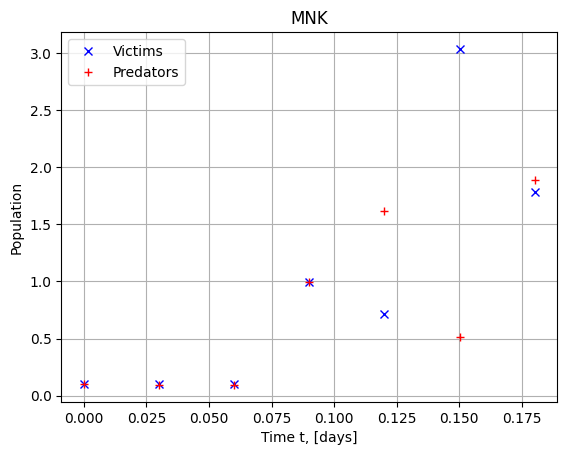

In [ ]:
plt.figure()
plt.grid()
plt.title("MNK")
plt.plot(t_array, res[:, 0], 'xb', label = 'Victims')
plt.plot(t_array, res[:, 1], '+r', label = "Predators")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

In [ ]:
res[4]

array([2.58124547, 0.58448974])

In [ ]:
res[1]

array([3.87275918, 2.18444274])

In [ ]:
res[2]

array([3.73178473, 2.37630104])